In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.model_selection import GridSearchCV

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("https://github.com/dsrscientist/dataset4/raw/main/Grades.csv")


In [7]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [9]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [14]:
#Showing all columns of the data
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [15]:
#Check if the data contains Nan value
na_cols=df.isna().any()
na_cols = na_cols[na_cols == True] 
print(na_cols)
#It turns out the data do not contain any Nan

CY-105       True
HS-105/12    True
MT-111       True
CS-106       True
EL-102       True
EE-119       True
ME-107       True
CS-107       True
HS-205/20    True
MT-222       True
EE-222       True
MT-224       True
CS-210       True
CS-211       True
CS-203       True
CS-214       True
EE-217       True
CS-212       True
CS-215       True
MT-331       True
EF-303       True
HS-304       True
CS-301       True
CS-302       True
TC-383       True
MT-442       True
EL-332       True
CS-318       True
CS-306       True
CS-312       True
CS-317       True
CS-403       True
CS-421       True
CS-406       True
CS-414       True
CS-419       True
CS-423       True
CS-412       True
dtype: bool


In [ ]:
x

In [18]:
y=df["PH-121"]
print(y.head())

0    B-
1     A
2     A
3     D
4    A-
Name: PH-121, dtype: object


In [21]:
x=df[["PH-121", "HS-101", "CY-105", "HS-105/12", "MT-111", "CS-105","CS-106", "EL-102","EE-119", "CS-312", "CS-317", "CS-403", "CS-421", "CS-406", "CS-414", "CS-419", "CS-423", "CS-412"]]
print(x)

    PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 CS-312  \
0       B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1        A      D     D+         D     B-      C      D      A     D+     D+   
2        A      B      A        B-     B+      A     B-     B+     A-      B   
3        D     C+     D+         D      D     A-     D+     C-      D     D+   
4       A-     A-     A-        B+      A      A     A-     B+      A     B-   
..     ...    ...    ...       ...    ...    ...    ...    ...    ...    ...   
566      B      A      A        A-     A+      A     A-     A-     A+     A-   
567     A+      A      A         A      A      A      A     A-      A     B+   
568      B      A     A-        B+      A      A      A      A      A     A-   
569      A     B+      D         A      D     D+     B-     C-     B-      D   
570      C      D      D         C      C     D+      B     C+      C     C+   

    CS-317 CS-403 CS-421 CS-406 CS-414 

In [22]:
x.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,B-,B+,B+,B-,A-,A,A-,A-,A


In [24]:
y=df["CGPA"]
print(y.head())

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64


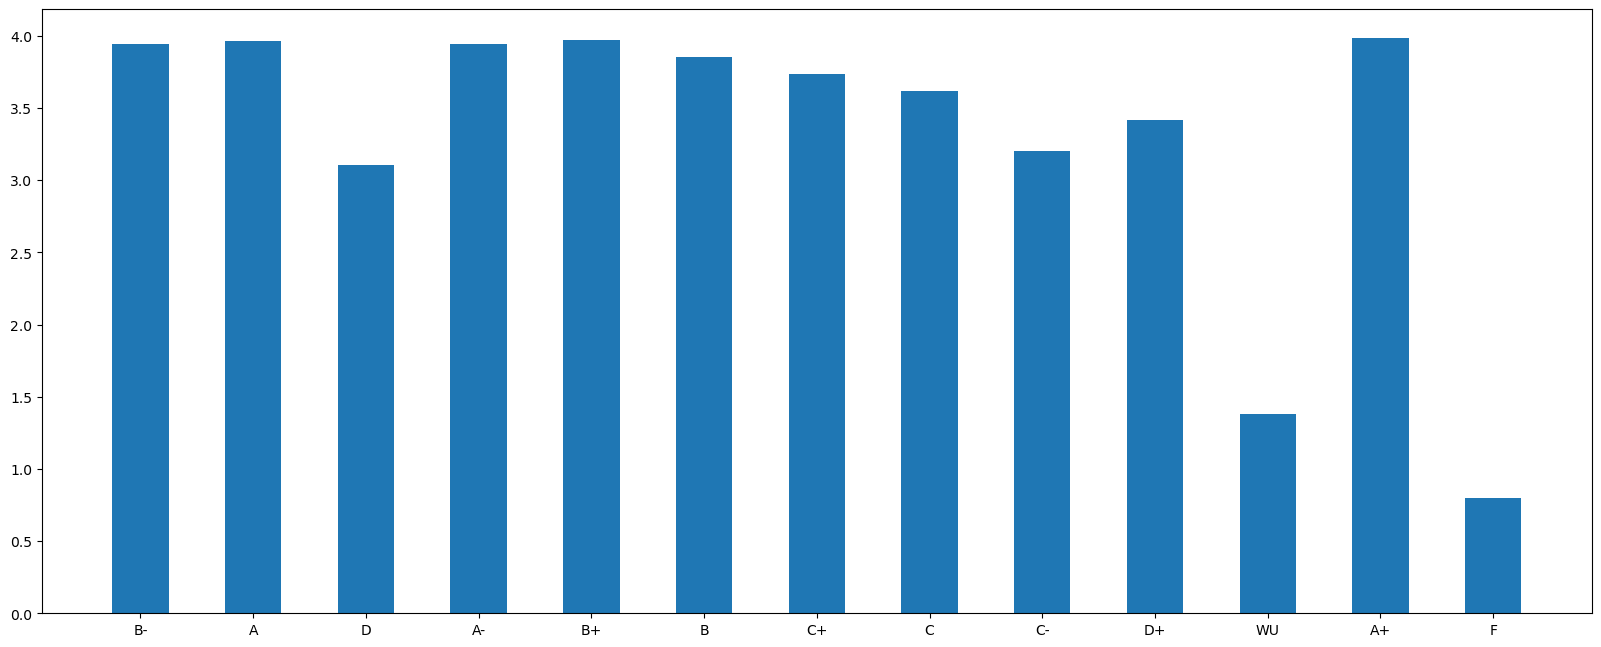

In [29]:
plt.figure(figsize=(20, 8), dpi=100)
plt.bar(df["PH-121"], y, width=0.5)
plt.show()

One student statistics was taken to display

In [33]:
X = df.drop(['PH-121'], axis=1)
y = df


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=40)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (342, 42)
X_test shape:  (229, 42)
y_train shpae:  (342, 43)
y_test shape:  (229, 43)
